Cluster Classification on randmly generated data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import make_blobs
%matplotlib inline

In [4]:
np.random.seed(0)

In [5]:
X, y = make_blobs(n_samples=5000, centers= [(4,4), (-2,-1), (2,-3), (1,1)], cluster_std=0.9)

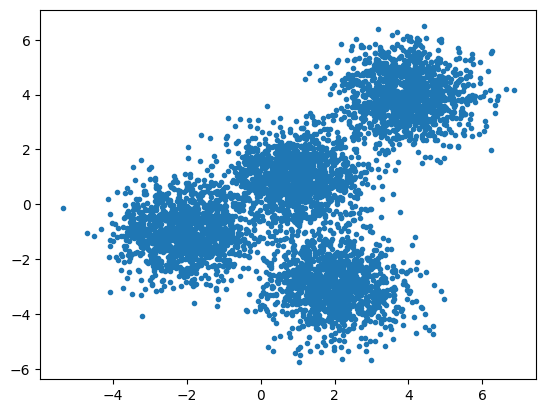

In [6]:
plt.scatter(X[:,0], X[:,1], marker='.')

In [44]:
k_means=KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=12, random_state=None, tol=0.0001)
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [45]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 1, 1, ..., 2, 3, 3])

In [46]:
k_means_cluster_centers=k_means.cluster_centers_
k_means_cluster_centers

array([[ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687],
       [-2.03743147, -0.99782524]])

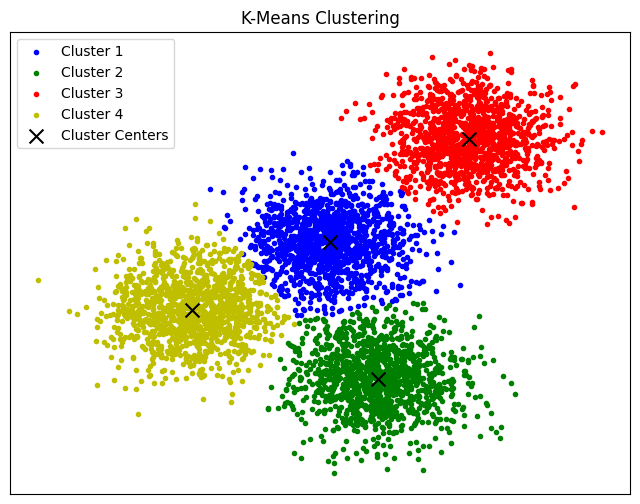

In [47]:
# Visualize the clusters
colors = ['b', 'g', 'r', 'y']  # Define colors for each cluster

plt.figure(figsize=(8, 6))

# Plot data points with their assigned clusters' colors
for i in range(4):
    cluster_data = X[k_means_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1],marker='.', c=colors[i], label=f'Cluster {i + 1}')

# Plot the cluster centers
plt.scatter(k_means_cluster_centers[:, 0], k_means_cluster_centers[:, 1], c='black', marker='x', s=100, label='Cluster Centers')

plt.title('K-Means Clustering')
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()

Cluster classification on historical dataset

In [64]:
cust_df = pd.read_csv('../csv/Cust_Segmentation.csv')
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [65]:
cust_df.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

In [66]:
cust_df=cust_df.drop('Address', axis=1)
cust_df=cust_df.drop('Customer Id', axis=1)
cust_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [68]:
from sklearn.preprocessing import StandardScaler

X=cust_df.values
X = np.nan_to_num(X)

Clus_data_set = StandardScaler().fit_transform(X)
Clus_data_set

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [69]:
Cluster_num = 3
cust_k_means = KMeans(init='k-means++',n_clusters=Cluster_num, n_init=12)
cust_k_means.fit(X)
labels = cust_k_means.labels_
print(labels)

[0 1 0 0 2 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 2 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 2 0 1 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2
 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 1 0 2 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 

In [71]:
cust_df['Clus_km']=labels
cust_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,1
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,2


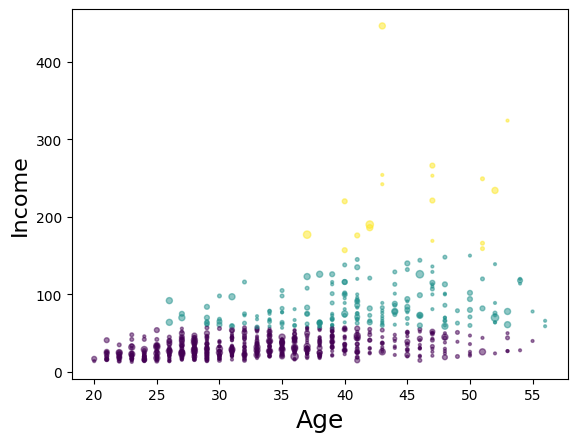

In [80]:
area = np.pi + (X[:,1]**2)

plt.scatter(X[:,0], X[:,3], area, labels.astype(np.float64),alpha=0.5)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Income', fontsize = 16)
plt.show()

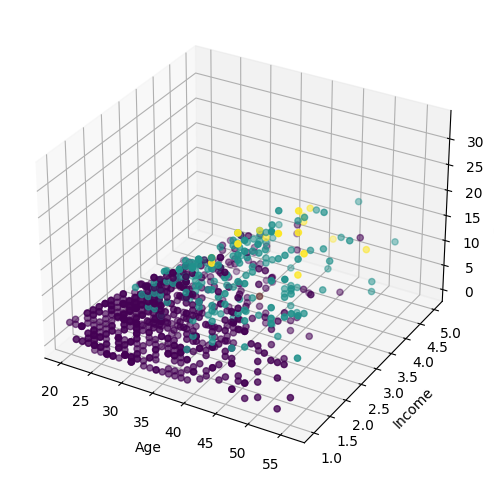

In [83]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = fig.add_subplot(111, projection='3d')  # Use fig.add_subplot to create a 3D subplot
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Education')

# Assuming X is a NumPy array with shape (n, 3) and labels is a 1D array of length n
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float64))

plt.show()  # Don't forget to show the plot

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Education')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float64))

# Enable interactivity for rotating the plot in Jupyter Notebook
%matplotlib notebook

plt.show()